<a href="https://colab.research.google.com/github/wang-xiaotu/CSG/blob/main/Top500_and_Workforce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import pandas as pd
import numpy as np
import time
import json
import requests
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

### Read and Format Top 500 Data


In [2]:
url = 'https://csgenome.org/api/benchmarks/top500?page=1&limit=35000' # we set the limit to the total number of entries so that we get the complete database in this request
top_500 = pd.json_normalize(requests.get(url).json()['data'])
top_500.fillna("N/A", inplace=True) 

top_500.drop(columns=['power_measured_size'], inplace=True) #drop empty column
top_500.columns = top_500.columns.str.replace('.', '_')

#### Format the Date


In [3]:
# Extract datetime information from the 'date' string
top_500['datetime'] = [datetime.datetime.strptime(d, '%Y-%m-%d') for d in top_500.publication_date]
# top_500.head(5)


,benchmark_type,hpcg,information_source,install_year,mflops_per_watt,n_half,n_max,note,power,power_efficiency,power_source,publication_date,r_max,r_peak,top500_first_appearance,top500_first_rank,top500_previous_rank,top500_rank,uid,system_application,system_architecture,system_computer,system_continent,system_latitude,system_longitude,system_moniker,system_region,system_segment,system_site,system_system_address,system_system_family,system_system_manufacturer,system_system_model,system_uid,datetime
0,top500,N/A,TOP500_2012/06,2011-06-01,2069.04,0,1.26812e+07,N/A,7890,N/A,N/A,2012-06-01,16324751.0,20132659.2,38,17,17,1,86264,N/A,MPP,"BlueGene/Q, Power BQC 16C 1.60 GHz, Custom",Americas,N/A,N/A,Sequoia,North America,Research,DOE/NNSA/LLNL,N/A,IBM BlueGene,IBM,BlueGene/Q,1,2012-06-01
1,top500,N/A,TOP500_2012/06,2011-06-01,830.18,0,1.18702e+07,N/A,12659.9,N/A,N/A,2012-06-01,10510000.0,11280384.0,37,1,1,2,86265,N/A,Cluster,"K computer, SPARC64 VIIIfx 2.0GHz, Tofu interc...",Asia,135.221,34.6534,N/A,Eastern Asia,Research,RIKEN Advanced Institute for Computational Sci...,"7-chōme-1-26 Minatojima Minamimachi, Chūō-ku, ...",Fujitsu Cluster,Fujitsu,K computer,2,2012-06-01
2,top500,N/A,TOP500_2012/06,2012-06-01,2069.04,0,0,N/A,3945,N/A,N/A,2012-06-01,8162376.0,10066330.0,39,3,N/A,3,86266,N/A,MPP,"BlueGene/Q, Power BQC 16C 1.60GHz, Custom",Americas,-87.9789,41.7183,Mira,North America,Research,DOE/SC/Argonne National Laboratory,"9700 S Cass Ave, Lemont, IL 60439, USA",IBM BlueGene,IBM,BlueGene/Q,3,2012-06-01
3,top500,N/A,TOP500_2012/06,2012-06-01,846.42,0,5.20192e+06,N/A,3422.67,N/A,N/A,2012-06-01,2897000.0,3185050.0,39,4,N/A,4,86267,N/A,Cluster,"iDataPlex DX360M4, Xeon E5-2680 8C 2.70GHz, In...",Europe,11.6686,48.2614,SuperMUC,Western Europe,Academic,Leibniz Rechenzentrum,"Boltzmannstraße 1, 85748 Garching bei München,...",IBM iDataPlex,IBM,iDataPlex DX360M4,4,2012-06-01
4,top500,N/A,TOP500_2012/06,2010-06-01,635.15,1e+06,3.6e+06,N/A,4040,N/A,N/A,2012-06-01,2566000.0,4701000.0,36,1,2,5,86268,N/A,MPP,"NUDT YH MPP, Xeon X5670 6C 2.93 GHz, NVIDIA 2050",Asia,117.727,39.0431,Tianhe-1A,Eastern Asia,Research,National Supercomputing Center in Tianjin,"7th St, Binhai Xinqu, Tianjin Shi, China",NUDT MPP,NUDT,NUDT YH MPP,5,2012-06-01


In [4]:
# Extract the year from the datetime info
# The value in the existing year column is messy so we standardize it with the year attribute of the datetime object
top_500['year'] = top_500.datetime.dt.year
# top_500.head(5)

,benchmark_type,hpcg,information_source,install_year,mflops_per_watt,n_half,n_max,note,power,power_efficiency,power_source,publication_date,r_max,r_peak,top500_first_appearance,top500_first_rank,top500_previous_rank,top500_rank,uid,system_application,system_architecture,system_computer,system_continent,system_latitude,system_longitude,system_moniker,system_region,system_segment,system_site,system_system_address,system_system_family,system_system_manufacturer,system_system_model,system_uid,datetime,year
0,top500,N/A,TOP500_2012/06,2011-06-01,2069.04,0,1.26812e+07,N/A,7890,N/A,N/A,2012-06-01,16324751.0,20132659.2,38,17,17,1,86264,N/A,MPP,"BlueGene/Q, Power BQC 16C 1.60 GHz, Custom",Americas,N/A,N/A,Sequoia,North America,Research,DOE/NNSA/LLNL,N/A,IBM BlueGene,IBM,BlueGene/Q,1,2012-06-01,2012
1,top500,N/A,TOP500_2012/06,2011-06-01,830.18,0,1.18702e+07,N/A,12659.9,N/A,N/A,2012-06-01,10510000.0,11280384.0,37,1,1,2,86265,N/A,Cluster,"K computer, SPARC64 VIIIfx 2.0GHz, Tofu interc...",Asia,135.221,34.6534,N/A,Eastern Asia,Research,RIKEN Advanced Institute for Computational Sci...,"7-chōme-1-26 Minatojima Minamimachi, Chūō-ku, ...",Fujitsu Cluster,Fujitsu,K computer,2,2012-06-01,2012
2,top500,N/A,TOP500_2012/06,2012-06-01,2069.04,0,0,N/A,3945,N/A,N/A,2012-06-01,8162376.0,10066330.0,39,3,N/A,3,86266,N/A,MPP,"BlueGene/Q, Power BQC 16C 1.60GHz, Custom",Americas,-87.9789,41.7183,Mira,North America,Research,DOE/SC/Argonne National Laboratory,"9700 S Cass Ave, Lemont, IL 60439, USA",IBM BlueGene,IBM,BlueGene/Q,3,2012-06-01,2012
3,top500,N/A,TOP500_2012/06,2012-06-01,846.42,0,5.20192e+06,N/A,3422.67,N/A,N/A,2012-06-01,2897000.0,3185050.0,39,4,N/A,4,86267,N/A,Cluster,"iDataPlex DX360M4, Xeon E5-2680 8C 2.70GHz, In...",Europe,11.6686,48.2614,SuperMUC,Western Europe,Academic,Leibniz Rechenzentrum,"Boltzmannstraße 1, 85748 Garching bei München,...",IBM iDataPlex,IBM,iDataPlex DX360M4,4,2012-06-01,2012
4,top500,N/A,TOP500_2012/06,2010-06-01,635.15,1e+06,3.6e+06,N/A,4040,N/A,N/A,2012-06-01,2566000.0,4701000.0,36,1,2,5,86268,N/A,MPP,"NUDT YH MPP, Xeon X5670 6C 2.93 GHz, NVIDIA 2050",Asia,117.727,39.0431,Tianhe-1A,Eastern Asia,Research,National Supercomputing Center in Tianjin,"7th St, Binhai Xinqu, Tianjin Shi, China",NUDT MPP,NUDT,NUDT YH MPP,5,2012-06-01,2012


In [5]:
top_500.replace("NA",np.nan, inplace=True)
top_500.replace("None",np.nan, inplace=True)
top_500.replace(" ","", inplace=True)

top_500 = top_500.astype({'uid':int,'top500_rank':float,'r_max':float,'r_peak':float, 'year':int})

Visualize R_Max and R_Peak

In [6]:
# Setting the grid and figure size to make the graph look nicer 
sns.set()
from pylab import rcParams
rcParams['figure.figsize'] = (12,8)

Text(0, 0.5, 'r peak (GFlops)')

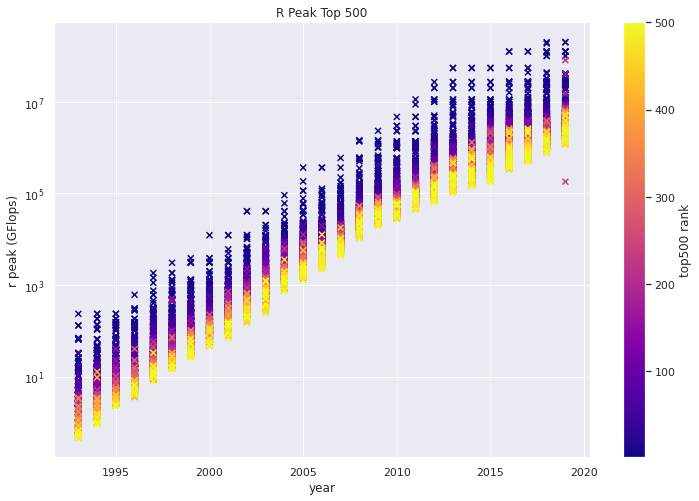

In [7]:
# Plotting
plot = plt.scatter(top_500.year, top_500.r_peak, c=top_500.top500_rank,cmap='plasma', marker='x')
plt.colorbar(plot, label='top500 rank')

# Adding a title
plt.title('R Peak Top 500')

# Changing the scale to a logarithmic scale 
plt.yscale('log')

# Add labels to the x and y axes
plt.xlabel('year')
plt.ylabel('r peak (GFlops)')

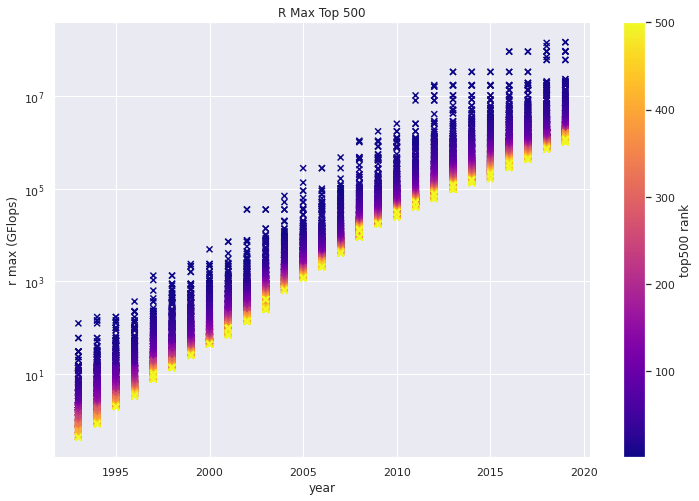

In [8]:
# plot
plot = plt.scatter(top_500.year, top_500.r_max, c=top_500.top500_rank,cmap='plasma', marker='x')

#Add a color bar annotating the top 500 rank of each datapoint
plt.colorbar(plot, label='top500 rank')

# #Add a title
plt.title('R Max Top 500')

#Use logarithmic scale
plt.yscale('log')

# Add X and y Label
plt.xlabel('year') 
plt.ylabel('r max (GFlops)')
plt.show()

#### Extract R_Max

In [9]:
#First we get the sum,1st rank, and 500th rank of r_max for each year and put them in a new dataframe
r_max_df = top_500.groupby(by='year', as_index=False).r_max.sum()
r_max_df['1st rank'] = top_500[top_500.top500_rank == 1].groupby(by='year', as_index=False).r_max.sum().r_max
r_max_df['500th rank'] = top_500[top_500.top500_rank == 500].groupby(by='year', as_index=False).r_max.sum().r_max
r_max_df['250 rank'] = top_500[top_500.top500_rank == 250].groupby(by='year', as_index=False).r_max.sum().r_max
r_max_df['251 rank'] = top_500[top_500.top500_rank == 251].groupby(by='year', as_index=False).r_max.sum().r_max
r_max_df['median rank'] = (r_max_df['250 rank'] + r_max_df['251 rank'])/2

r_max_df.set_index('year', inplace=True)

r_max_df.columns = ['sum', '1st rank', '500th rank', '250th rank', '251th rank', 'median']
r_max_df.head(5)

,sum,1st rank,500th rank,250th rank,251th rank,median
year,,,,,,
1993,2589.055,183.7,0.894,2.440,2.440,2.440
1994,4856.220,313.4,1.936,3.982,3.982,3.982
1995,8711.576,340.0,4.444,8.100,8.100,8.100
1996,13875.773,588.6,7.926,13.435,13.435,13.435
1997,29742.489,2406.0,17.183,27.450,27.200,27.325


#### Extract R_Peak

In [10]:
# Do the same thing for r_peak 
r_peak_df = top_500.groupby(by='year', as_index=False).r_peak.sum()
r_peak_df['1st rank'] = top_500[top_500.top500_rank == 1].groupby(by='year', as_index=False).r_peak.sum().r_peak
r_peak_df['500th rank'] = top_500[top_500.top500_rank == 500].groupby(by='year', as_index=False).r_peak.sum().r_peak

r_peak_df['250 rank'] = top_500[top_500.top500_rank == 250].groupby(by='year', as_index=False).r_peak.sum().r_peak
r_peak_df['251 rank'] = top_500[top_500.top500_rank == 251].groupby(by='year', as_index=False).r_peak.sum().r_peak
r_peak_df['median rank'] = (r_peak_df['250 rank'] + r_peak_df['251 rank'])/2

r_peak_df.set_index('year', inplace=True)

r_peak_df.columns = ['sum', '1st rank', '500th rank', '250th rank', '251th rank', 'median']
r_peak_df.head(5)

,sum,1st rank,500th rank,250th rank,251th rank,median
year,,,,,,
1993,4.189088e+03,3.667900e+02,1.390,3.810,3.810,3.810
1994,7.699417e+03,4.197900e+02,2.273,5.227,5.227,5.227
1995,1.270238e+04,4.715800e+02,5.257,11.184,11.184,11.184
1996,1.950027e+04,9.216000e+02,12.880,23.580,23.580,23.580
1997,4.275665e+04,3.283400e+03,19.000,58.800,58.500,58.650
1998,7.623390e+04,3.660800e+03,35.500,70.080,61.800,65.940
1999,1.349228e+05,6.361000e+03,72.600,155.260,165.500,160.380
2000,2.276059e+05,1.549500e+04,129.200,177.280,243.200,210.240
2001,3.578438e+05,2.457600e+04,235.200,383.800,381.180,382.490


## Mobile Devices Sales versus CPU performance





### Read Mobile Devices Sales Data

In [90]:
from google.colab import files
uploaded = files.upload()

#vgsales=pd.read_csv("../input/videogamesales/vgsales.csv")


Saving Smartphone.csv to Smartphone (1).csv


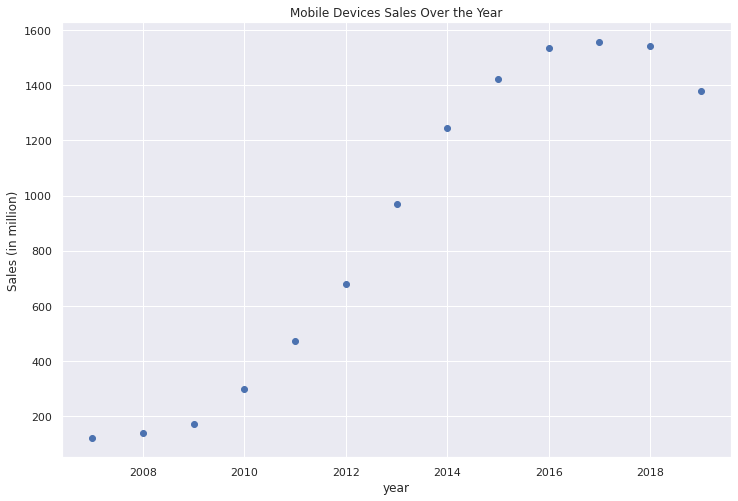

In [95]:
import io 
  
mobile_df0 = pd.read_csv(io.BytesIO(uploaded['Smartphone.csv']))
mobile_df0.set_index('Year', inplace=True)

mobile_df = mobile_df0.drop(index = 2020)

plot = plt.scatter(mobile_df.index.to_series(), mobile_df["Sales"])

# #Add a title
plt.title('Mobile Devices Sales Over the Year')


# Add X and y Label
plt.xlabel('year') 
plt.ylabel('Sales (in million)')
plt.show()

### Plot R_Max Versus Mobile Devices *Sales*

In [13]:
r_max_df_mobile = r_max_df[r_max_df.index.to_series().between(2007, 2019)]
sales_col = mobile_df['Sales']
r_max_df_mobile = r_max_df_mobile.join(sales_col)
r_max_df_mobile.head(5)

,sum,1st rank,500th rank,250th rank,251th rank,median,Sales
year,,,,,,,
2007,1.191276e+07,7.588000e+05,9934.60,14076.00,14058.05,14067.025,122.32
2008,2.862734e+07,2.131000e+06,21590.28,30814.40,30680.10,30747.250,139.29
2009,5.058550e+07,2.864000e+06,37139.80,51529.80,51338.20,51434.000,172.38
2010,7.610778e+07,4.325000e+06,55782.20,73655.90,73535.30,73595.600,296.65
2011,1.329997e+08,1.867200e+07,91128.70,121569.00,121549.00,121559.000,472.00
2012,2.855572e+08,3.391475e+07,137235.40,197861.73,197063.40,197462.565,680.11
2013,4.737348e+08,6.772540e+07,214450.30,319835.00,318462.00,319148.500,969.72
2014,5.826143e+08,6.772540e+07,287081.00,430466.00,428851.30,429658.650,1244.74
2015,7.804595e+08,6.772540e+07,371094.72,669337.00,665338.00,667337.500,1423.90


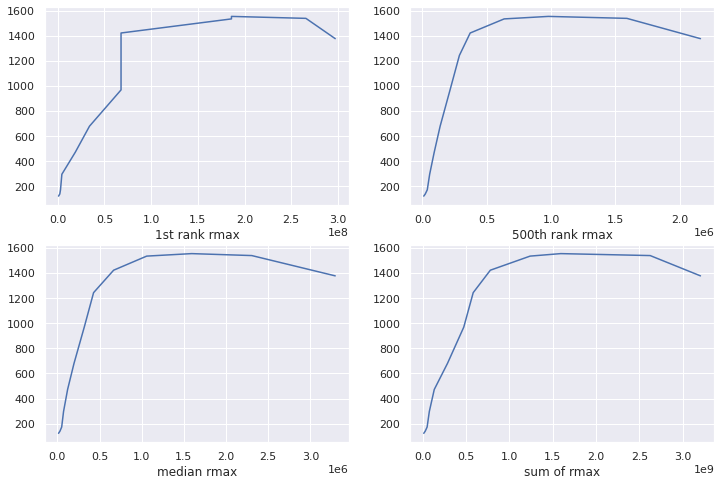

In [14]:
# plot
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(r_max_df_mobile['1st rank'], r_max_df_mobile['Sales'])
axs[0, 0].set(xlabel = '1st rank rmax')
axs[0, 1].plot(r_max_df_mobile['500th rank'], r_max_df_mobile['Sales'])
axs[0, 1].set(xlabel = '500th rank rmax')
axs[1, 0].plot(r_max_df_mobile['median'], r_max_df_mobile['Sales'])
axs[1, 0].set(xlabel = 'median rmax')
axs[1, 1].plot(r_max_df_mobile['sum'], r_max_df_mobile['Sales'])
axs[1, 1].set(xlabel = 'sum of rmax')

#Add a title
# plt.title('R_peak of the first and last rank and the sum of all processors in Top 500 over the year')

#Use logarithmic scale
# plt.yscale('log')

# Add X and y Label
# plt.xlabel('year')
# plt.ylabel('r peak')
plt.show()

In [103]:
mobile_corr = r_max_df_mobile.corr()
mobile_corr

,sum,1st rank,500th rank,250th rank,251th rank,median,Sales
sum,1.000000,0.980435,0.994471,0.994489,0.994545,0.994517,0.757932
1st rank,0.980435,1.000000,0.961407,0.965739,0.965842,0.965791,0.819059
500th rank,0.994471,0.961407,1.000000,0.998328,0.998381,0.998355,0.695114
250th rank,0.994489,0.965739,0.998328,1.000000,0.999999,1.000000,0.715878
251th rank,0.994545,0.965842,0.998381,0.999999,1.000000,1.000000,0.715567
median,0.994517,0.965791,0.998355,1.000000,1.000000,1.000000,0.715722
Sales,0.757932,0.819059,0.695114,0.715878,0.715567,0.715722,1.000000


### Plot R_Peak Versus Mobile Devices *Sales*

In [15]:
r_peak_df_mobile = r_peak_df[r_peak_df.index.to_series().between(2007, 2019)]
r_peak_df_mobile = r_peak_df_mobile.join(sales_col)
r_peak_df_mobile.head(5)

,sum,1st rank,500th rank,250th rank,251th rank,median,Sales
year,,,,,,,
2007,1.774133e+07,963378.0,15375.40,17817.60,17817.0,17817.30,122.32
2008,4.284726e+07,2832480.0,39952.60,56342.60,55392.0,55867.30,139.29
2009,7.462173e+07,3787700.0,65636.70,96336.00,85474.6,90905.30,172.38
2010,1.131258e+08,7032000.0,113350.80,135179.20,110716.5,122947.85,296.65
2011,1.928076e+08,20054014.0,172140.60,200843.00,225412.0,213127.50,472.00
2012,4.011471e+08,47245209.2,214846.00,318362.00,290677.0,304519.50,680.11
2013,6.904096e+08,109804800.0,426835.00,626496.00,525135.0,575815.50,969.72
2014,8.570613e+08,109804800.0,463053.00,538450.60,617433.6,577942.10,1244.74
2015,1.151152e+09,109804800.0,511949.28,948997.76,1530010.0,1239503.88,1423.90


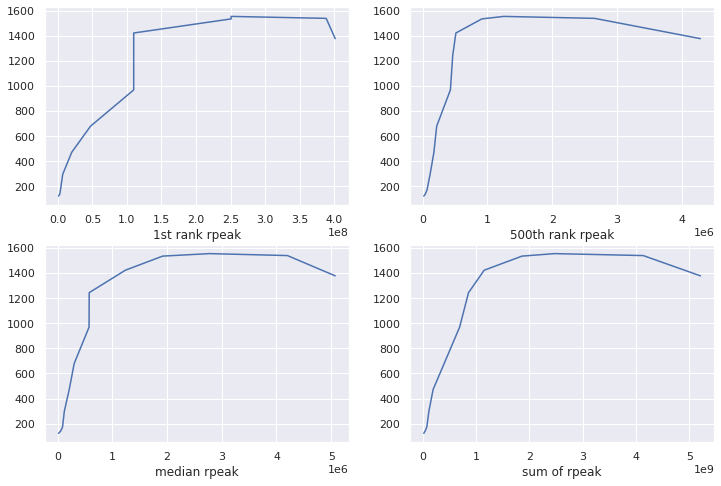

In [16]:
# plot
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(r_peak_df_mobile['1st rank'], r_peak_df_mobile['Sales'])
axs[0, 0].set(xlabel = '1st rank rpeak')
axs[0, 1].plot(r_peak_df_mobile['500th rank'], r_peak_df_mobile['Sales'])
axs[0, 1].set(xlabel = '500th rank rpeak')
axs[1, 0].plot(r_peak_df_mobile['median'], r_peak_df_mobile['Sales'])
axs[1, 0].set(xlabel = 'median rpeak')
axs[1, 1].plot(r_peak_df_mobile['sum'], r_peak_df_mobile['Sales'])
axs[1, 1].set(xlabel = 'sum of rpeak')

#Add a title
# plt.title('R_peak of the first and last rank and the sum of all processors in Top 500 over the year')

#Use logarithmic scale
# plt.yscale('log')

# Add X and y Label
# plt.xlabel('year')
# plt.ylabel('r peak')
plt.show()

In [104]:
mobile_corr2 = r_peak_df_mobile.corr()
mobile_corr2

,sum,1st rank,500th rank,250th rank,251th rank,median,Sales
sum,1.000000,0.973639,0.977077,0.987235,0.996312,0.996693,0.738966
1st rank,0.973639,1.000000,0.912347,0.980691,0.960636,0.973983,0.836367
500th rank,0.977077,0.912347,1.000000,0.938183,0.976812,0.963791,0.613450
250th rank,0.987235,0.980691,0.938183,1.000000,0.981979,0.994505,0.757244
251th rank,0.996312,0.960636,0.976812,0.981979,1.000000,0.996368,0.725428
median,0.996693,0.973983,0.963791,0.994505,0.996368,1.000000,0.743018
Sales,0.738966,0.836367,0.613450,0.757244,0.725428,0.743018,1.000000


## Worker Productivity versus CPU performance in USA

In [97]:
from google.colab import files
uploaded = files.upload()

Saving labor-productivity-per-hour-PennWorldTable.csv to labor-productivity-per-hour-PennWorldTable (1).csv


Text(0, 0.5, 'Productivity GPD/hr')

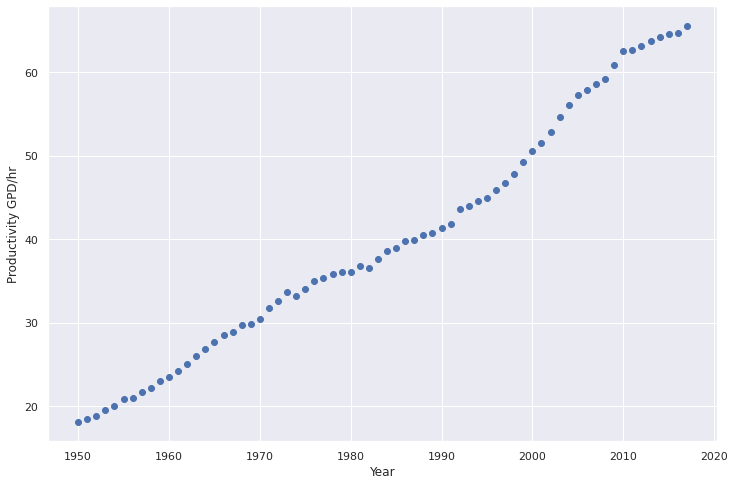

In [99]:
labor_df0 = pd.read_csv(io.BytesIO(uploaded['labor-productivity-per-hour-PennWorldTable.csv']))

labor_df0.columns = ["Entity", "Code", "Year", "Productivity"]
labor_df1 = labor_df0[labor_df0['Code']=="USA"] 


plot = plt.scatter(labor_df1["Year"], labor_df1['Productivity'])
plt.xlabel("Year")
plt.ylabel("Productivity GPD/hr")

### Productivity versus R_Max

In [84]:
labor_df1.set_index("Year", inplace=True)
labor_df = labor_df1[labor_df1.index.to_series().between(1993,2017)]
labor = labor_df['Productivity']
r_max_df_pro = r_max_df[r_max_df.index.to_series().between(1993,2017)]
r_max_df_pro = r_max_df_pro.join(labor)
r_max_df_pro.head(5)

,sum,1st rank,500th rank,250th rank,251th rank,median,Productivity
year,,,,,,,
1993,2589.055,183.7,0.894,2.440,2.440,2.440,44.014053
1994,4856.220,313.4,1.936,3.982,3.982,3.982,44.520851
1995,8711.576,340.0,4.444,8.100,8.100,8.100,44.883690
1996,13875.773,588.6,7.926,13.435,13.435,13.435,45.857944
1997,29742.489,2406.0,17.183,27.450,27.200,27.325,46.770359


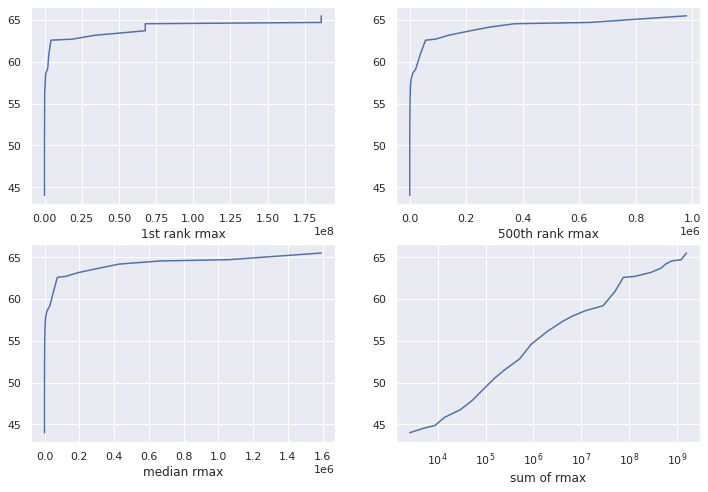

In [86]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(r_max_df_pro['1st rank'], r_max_df_pro['Productivity'])
axs[0, 0].set(xlabel = '1st rank rmax')
axs[0, 1].plot(r_max_df_pro['500th rank'], r_max_df_pro['Productivity'])
axs[0, 1].set(xlabel = '500th rank rmax')
axs[1, 0].plot(r_max_df_pro['median'], r_max_df_pro['Productivity'])
axs[1, 0].set(xlabel = 'median rmax')
axs[1, 1].plot(r_max_df_pro['sum'], r_max_df_pro['Productivity'])
axs[1, 1].set(xlabel = 'sum of rmax')

#Add a title
# plt.title('R_max of the first and last rank and the sum of all processors in Top 500 over the year')

#Use logarithmic scale
plt.xscale('log')

# Add X and y Label
# plt.xlabel('year')
# plt.ylabel('r max')
plt.show()

In [105]:
pro_corr = r_max_df_pro.corr()
pro_corr

,sum,1st rank,500th rank,250th rank,251th rank,median,Productivity
sum,1.000000,0.984016,0.992457,0.992879,0.992913,0.992896,0.618745
1st rank,0.984016,1.000000,0.972122,0.970283,0.970619,0.970451,0.594853
500th rank,0.992457,0.972122,1.000000,0.998855,0.998867,0.998862,0.596727
250th rank,0.992879,0.970283,0.998855,1.000000,0.999998,1.000000,0.585244
251th rank,0.992913,0.970619,0.998867,0.999998,1.000000,1.000000,0.585142
median,0.992896,0.970451,0.998862,1.000000,1.000000,1.000000,0.585193
Productivity,0.618745,0.594853,0.596727,0.585244,0.585142,0.585193,1.000000


### Productivity versus R_Peak

In [87]:
r_peak_df_pro = r_peak_df[r_peak_df.index.to_series().between(1993,2017)]
r_peak_df_pro = r_peak_df_pro.join(labor)
r_peak_df_pro.head(5)

,sum,1st rank,500th rank,250th rank,251th rank,median,Productivity
year,,,,,,,
1993,4189.088,366.79,1.390,3.810,3.810,3.810,44.014053
1994,7699.417,419.79,2.273,5.227,5.227,5.227,44.520851
1995,12702.378,471.58,5.257,11.184,11.184,11.184,44.883690
1996,19500.268,921.60,12.880,23.580,23.580,23.580,45.857944
1997,42756.654,3283.40,19.000,58.800,58.500,58.650,46.770359


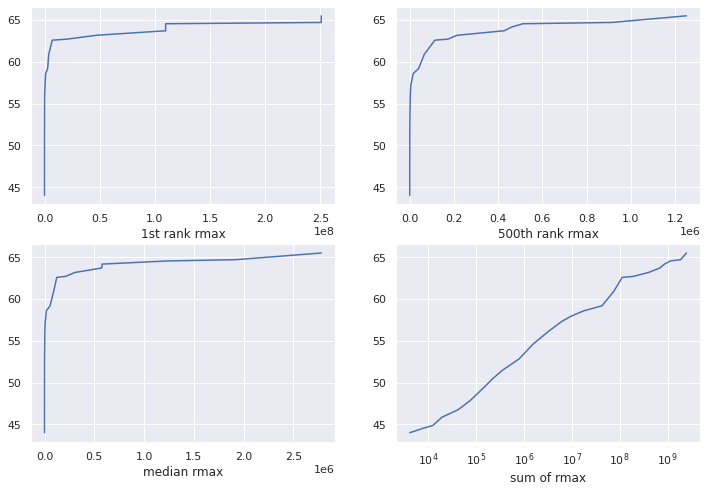

In [88]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(r_peak_df_pro['1st rank'], r_peak_df_pro['Productivity'])
axs[0, 0].set(xlabel = '1st rank rmax')
axs[0, 1].plot(r_peak_df_pro['500th rank'], r_peak_df_pro['Productivity'])
axs[0, 1].set(xlabel = '500th rank rmax')
axs[1, 0].plot(r_peak_df_pro['median'], r_peak_df_pro['Productivity'])
axs[1, 0].set(xlabel = 'median rmax')
axs[1, 1].plot(r_peak_df_pro['sum'], r_peak_df_pro['Productivity'])
axs[1, 1].set(xlabel = 'sum of rmax')

#Add a title
# plt.title('R_max of the first and last rank and the sum of all processors in Top 500 over the year')

#Use logarithmic scale
plt.xscale('log')

# Add X and y Label
# plt.xlabel('year')
# plt.ylabel('r max')
plt.show()

In [106]:
pro_corr2 = r_peak_df_pro.corr()
pro_corr2

,sum,1st rank,500th rank,250th rank,251th rank,median,Productivity
sum,1.000000,0.984311,0.995898,0.988503,0.989592,0.992463,0.610523
1st rank,0.984311,1.000000,0.984404,0.962618,0.958003,0.963527,0.612208
500th rank,0.995898,0.984404,1.000000,0.985970,0.977695,0.985059,0.641144
250th rank,0.988503,0.962618,0.985970,1.000000,0.986317,0.996328,0.568542
251th rank,0.989592,0.958003,0.977695,0.986317,1.000000,0.996810,0.578980
median,0.992463,0.963527,0.985059,0.996328,0.996810,1.000000,0.575916
Productivity,0.610523,0.612208,0.641144,0.568542,0.578980,0.575916,1.000000


## Video Games Sales versus CPU performance

### Read Video Games Data

In [17]:
from google.colab import files
uploaded = files.upload()

Saving vgsalesGlobale.csv to vgsalesGlobale.csv


In [32]:
import io 
  
games_df0 = pd.read_csv(io.BytesIO(uploaded['vgsalesGlobale.csv']))
games_df0.head(182)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
177,178,Professor Layton and the Curious Village,DS,2007.0,Puzzle,Nintendo,1.22,2.48,1.03,0.52,5.26
178,179,Tomb Raider II,PS,1997.0,Action,Eidos Interactive,2.30,2.46,0.20,0.28,5.24
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
180,181,Dragon Quest VIII: Journey of the Cursed King,PS2,2004.0,Role-Playing,Square Enix,0.65,0.75,3.61,0.20,5.21


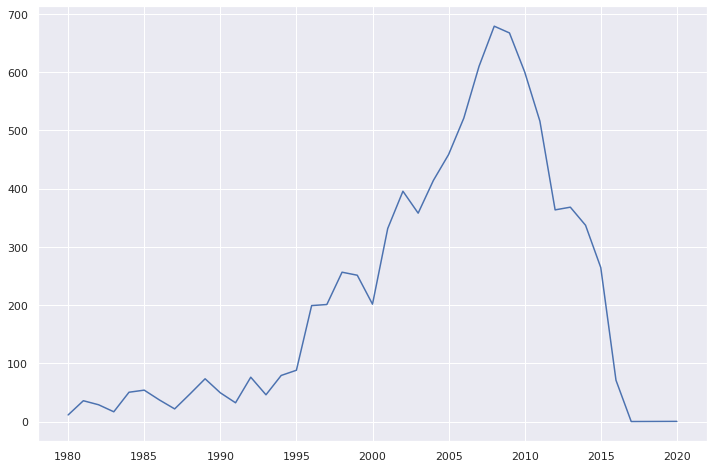

In [61]:

games_df0 = games_df0.dropna()

games_df0.head(182)
games_df0 = games_df0.astype({'Year':int})
#games_df['Total_Sales'] = games_df0.groupby(by='Year', as_index=False).r_peak.sum().r_peak

games_df = games_df0.groupby(by='Year',as_index=False).Global_Sales.sum()

games_df.set_index('Year', inplace=True)

games_df.columns = ['Total_Sales']

fig, axs = plt.subplots(1, 1)
axs.plot(games_df.index.to_series(), games_df['Total_Sales'])

### Plot Video Games Sales versus *R_Max*

In [58]:
games_df2 = games_df[games_df.index.to_series().between(1993, 2016)]
games_sales = games_df2['Total_Sales']
r_max_df_game = r_max_df[r_max_df.index.to_series().between(1993,2016)]
r_max_df_game = r_max_df_game.join(games_sales)
r_max_df_game.head(5)

,sum,1st rank,500th rank,250th rank,251th rank,median,Total_Sales
year,,,,,,,
1993,2589.055,183.7,0.894,2.440,2.440,2.440,45.98
1994,4856.220,313.4,1.936,3.982,3.982,3.982,79.17
1995,8711.576,340.0,4.444,8.100,8.100,8.100,88.11
1996,13875.773,588.6,7.926,13.435,13.435,13.435,199.15
1997,29742.489,2406.0,17.183,27.450,27.200,27.325,200.98


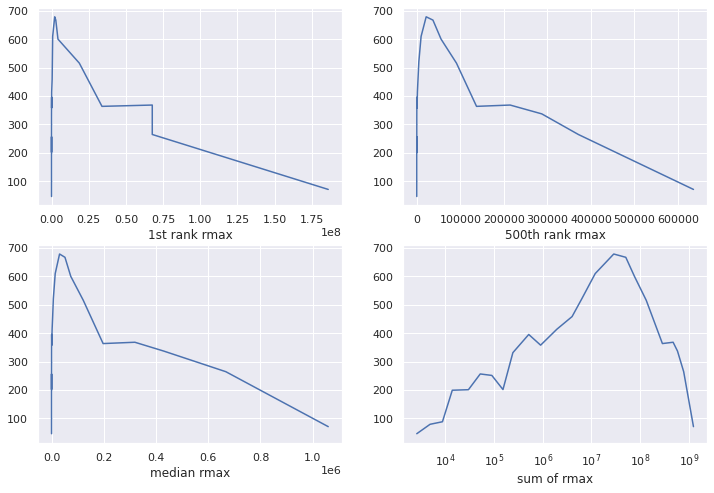

In [59]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(r_max_df_game['1st rank'], r_max_df_game['Total_Sales'])
axs[0, 0].set(xlabel = '1st rank rmax')
axs[0, 1].plot(r_max_df_game['500th rank'], r_max_df_game['Total_Sales'])
axs[0, 1].set(xlabel = '500th rank rmax')
axs[1, 0].plot(r_max_df_game['median'], r_max_df_game['Total_Sales'])
axs[1, 0].set(xlabel = 'median rmax')
axs[1, 1].plot(r_max_df_game['sum'], r_max_df_game['Total_Sales'])
axs[1, 1].set(xlabel = 'sum of rmax')

#Add a title
# plt.title('R_max of the first and last rank and the sum of all processors in Top 500 over the year')

#Use logarithmic scale
plt.xscale('log')

# Add X and y Label
# plt.xlabel('year')
# plt.ylabel('r max')
plt.show()

In [108]:
video_corr = r_max_df_game.corr()
video_corr

,sum,1st rank,500th rank,250th rank,251th rank,median,Total_Sales
sum,1.000000,0.976966,0.998012,0.996337,0.996272,0.996305,-0.233794
1st rank,0.976966,1.000000,0.980846,0.973395,0.973848,0.973622,-0.263300
500th rank,0.998012,0.980846,1.000000,0.997438,0.997486,0.997463,-0.215952
250th rank,0.996337,0.973395,0.997438,1.000000,0.999997,0.999999,-0.234570
251th rank,0.996272,0.973848,0.997486,0.999997,1.000000,0.999999,-0.234837
median,0.996305,0.973622,0.997463,0.999999,0.999999,1.000000,-0.234703
Total_Sales,-0.233794,-0.263300,-0.215952,-0.234570,-0.234837,-0.234703,1.000000


### Plot Video Games Sales versus R_Peak

In [55]:
games_df2 = games_df[games_df.index.to_series().between(1993, 2016)]
games_sales = games_df2['Total_Sales']
r_peak_df_game = r_peak_df[r_peak_df.index.to_series().between(1993,2016)]
r_peak_df_game = r_peak_df_game.join(games_sales)
r_peak_df_game

,sum,1st rank,500th rank,250th rank,251th rank,median,Total_Sales
year,,,,,,,
1993,4.189088e+03,3.667900e+02,1.390,3.810,3.810,3.810,45.98
1994,7.699417e+03,4.197900e+02,2.273,5.227,5.227,5.227,79.17
1995,1.270238e+04,4.715800e+02,5.257,11.184,11.184,11.184,88.11
1996,1.950027e+04,9.216000e+02,12.880,23.580,23.580,23.580,199.15
1997,4.275665e+04,3.283400e+03,19.000,58.800,58.500,58.650,200.98
1998,7.623390e+04,3.660800e+03,35.500,70.080,61.800,65.940,256.47
1999,1.349228e+05,6.361000e+03,72.600,155.260,165.500,160.380,251.27
2000,2.276059e+05,1.549500e+04,129.200,177.280,243.200,210.240,201.56
2001,3.578438e+05,2.457600e+04,235.200,383.800,381.180,382.490,331.47


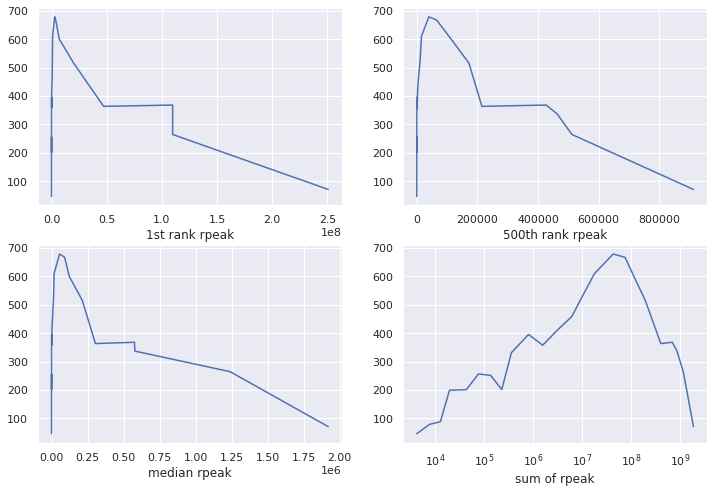

In [57]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(r_peak_df_game['1st rank'], r_peak_df_game['Total_Sales'])
axs[0, 0].set(xlabel = '1st rank rpeak')
axs[0, 1].plot(r_peak_df_game['500th rank'], r_peak_df_game['Total_Sales'])
axs[0, 1].set(xlabel = '500th rank rpeak')
axs[1, 0].plot(r_peak_df_game['median'], r_peak_df_game['Total_Sales'])
axs[1, 0].set(xlabel = 'median rpeak')
axs[1, 1].plot(r_peak_df_game['sum'], r_peak_df_game['Total_Sales'])
axs[1, 1].set(xlabel = 'sum of rpeak')

plt.show()

In [109]:
video_corr2 = r_peak_df_game.corr()
video_corr2

,sum,1st rank,500th rank,250th rank,251th rank,median,Total_Sales
sum,1.000000,0.987175,0.991917,0.988857,0.979498,0.989001,-0.236450
1st rank,0.987175,1.000000,0.989080,0.984455,0.944825,0.968025,-0.256824
500th rank,0.991917,0.989080,1.000000,0.981137,0.954961,0.972045,-0.181269
250th rank,0.988857,0.984455,0.981137,1.000000,0.978727,0.993689,-0.236123
251th rank,0.979498,0.944825,0.954961,0.978727,1.000000,0.995564,-0.244552
median,0.989001,0.968025,0.972045,0.993689,0.995564,1.000000,-0.241988
Total_Sales,-0.236450,-0.256824,-0.181269,-0.236123,-0.244552,-0.241988,1.000000
